In [3]:
#___________________________________________________________________________________________________________________
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

import matplotlib
matplotlib.rcParams['contour.negative_linestyle']= 'solid'
import matplotlib.pyplot as plt
import sys
import os
sys.path.append("src/")
from sub_mesh        import * 
from sub_data        import * 
from sub_moc         import * 
from sub_plot        import * 
from colormap_c2c    import colormap_c2c
import time as time 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
meshpath='/work/ollie/pscholz/mesh_fesom2.0/core2_GEBCO15sec_smth@elem/'
mesh=load_mesh_fesom2(meshpath, do_rot='None', focus=0, do_info=True, do_pickle=True,)
#                       do_earea=True, do_narea=True, do_eresol=[True,'mean'], do_nresol=[True,'eresol'])

 > found *.pckl file: /work/ollie/pscholz/mesh_fesom2.0/core2_GEBCO15sec_smth@elem
 > load  *.pckl file: tripyview_fesom2_core2_GEBCO15sec_smth@elem.pckl
___FESOM2 MESH INFO________________________
 > path            = /work/ollie/pscholz/mesh_fesom2.0/core2_GEBCO15sec_smth@elem
 > id              = core2_GEBCO15sec_smth@elem
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = True
 > do earea,eresol = True, True
 > do narea,nresol = True, True
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________


# Calculate Meridional Overturning Circulation (MOC) Profile

Use for the calculation of the Meridional Overturning Circulation (MOC) the equation for the calculation of the "Pseudostreamfunction". Condition for the calculation of the regional MOC (i.e AMOC, PMOC, IMOC) is that the domain over which the caluclation is carried out, is approximately sorounded by a coast (Bering Strait can be accouted as coast its just 30m deep). Since Atlantic, Pacific and Indian Ocean have no southern coastal boundary the AMOC and PMOC can just be calculated until -30°S and the meridional cumulativ integration has to be carried out from North to South instead South to North which leads to an additional minus sign in the calcualtion (see: sub_fesom_moc.py, line:137)
$${\int_E^W w(x',y,z) dx' = {{\partial\Psi} \over {\partial y}}}$$
$$ \textrm{GMOC:} ~~~  {\Psi(y,z) = \int_S^N {\int_E^W w(x',y',z) \cdot dx'} dy'} ~~$$
$$ \textrm{AMOC:} ~~~  {\Psi(y,z) = -\int_N^{-30S^\circ} {\int_E^W w(x',y',z) \cdot dx'} dy'} $$
$$ \textrm{PMOC:} ~~~  {\Psi(y,z) = -\int_{Bering Strait} ^{-30S^\circ} {\int_E^W w(x',y',z) \cdot dx'} dy'} $$

## > <u>Compute MOC</u>:

_____calc. AAMOC from vertical velocities via meridional bins_____
 --> total time:0.691 s
 max. NADW_smth = 16.45 Sv
 max. AABW_smth = -3.43 Sv


<IPython.core.display.Javascript object>


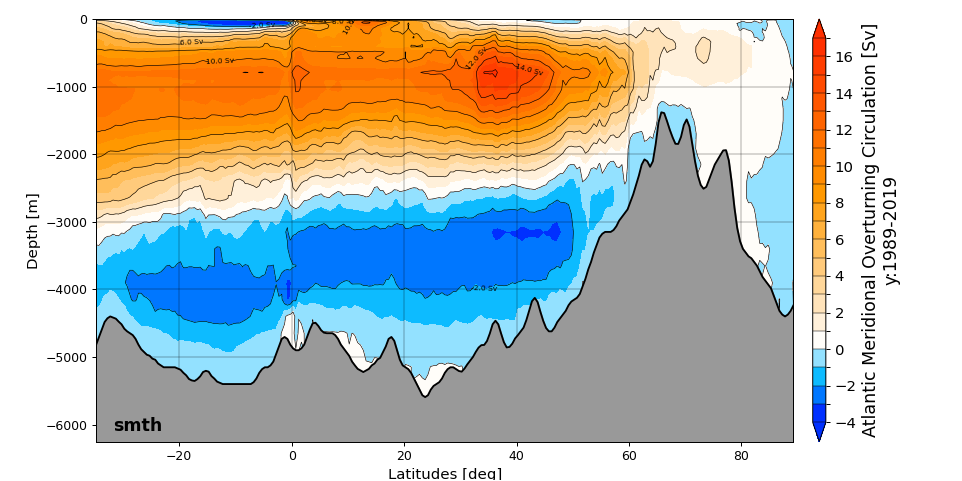

 > save figure: /home/ollie/pscholz/figures/test_moc/aamoc_smth_y1989-2019.png


In [46]:
add_bolusw = True
do_tarithm = 'mean'
savepath   = '~/figures/test_moc/'
year       = [1989,2019]
#____________________________________________________________________________________________________
# load vertical velocity 
datapath  = '/work/ollie/pscholz/results_fesom2.0/test_GEBCO15sec_smth@elem/1/'
data      = load_data_fesom2(mesh, datapath, vname='w', year=year, descript='smth', do_info=False, do_tarithm=do_tarithm)
if add_bolusw: data['w'].data = data['w'].data+load_data_fesom2(mesh, datapath, vname='bolus_w', year=year, do_info=False, do_tarithm=do_tarithm)['bolus_w'].data

#%%prun -s cumulative -q -l 100 -D profile.bin #write out profile file usable with snakeviz profile.bin
#____________________________________________________________________________________________________
which_moc = 'aamoc' 
# gmoc  ... global MOC
# amoc  ... atlantic MOC
# aamoc ... atlantic+arctic MOC
# pmoc  ... pacific MOC
# ipmoc ... indian+pacific MOC
# imoc  ... indian MOC

#____________________________________________________________________________________________________
# compute moc 
moc  = calc_xmoc(mesh , data , which_moc=which_moc)

#____________________________________________________________________________________________________
# plot moc
if savepath is not None:
    str_descr = data['w'].attrs['descript'].replace(' ','_').replace(':','')
    savepath  = '{}/{}_{}_{}.png'.format(savepath, which_moc, str_descr, data['w'].attrs['str_lsave']) 
fig, ax, cbar=plot_xmoc([moc], which_moc=which_moc, n_rc=[1,1], figsize=[12,6],
                       do_save = savepath)
                       

## > <u>Compute MOC anomaly</u>:

_____calc. GMOC from vertical velocities via meridional bins_____
 --> total time:1.081 s
 max. NADW_smth = 17.76 Sv
 max. AABW_smth = -16.19 Sv
_____calc. GMOC from vertical velocities via meridional bins_____
 --> total time:1.078 s
 max. NADW_ctrl = 16.41 Sv
 max. AABW_ctrl = -17.17 Sv


<IPython.core.display.Javascript object>


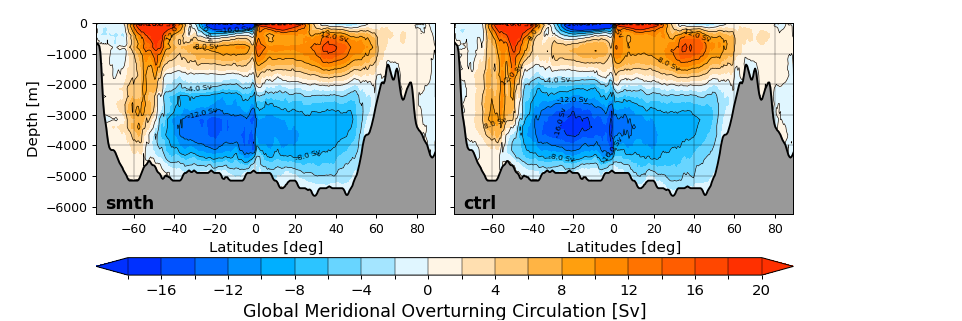

<IPython.core.display.Javascript object>


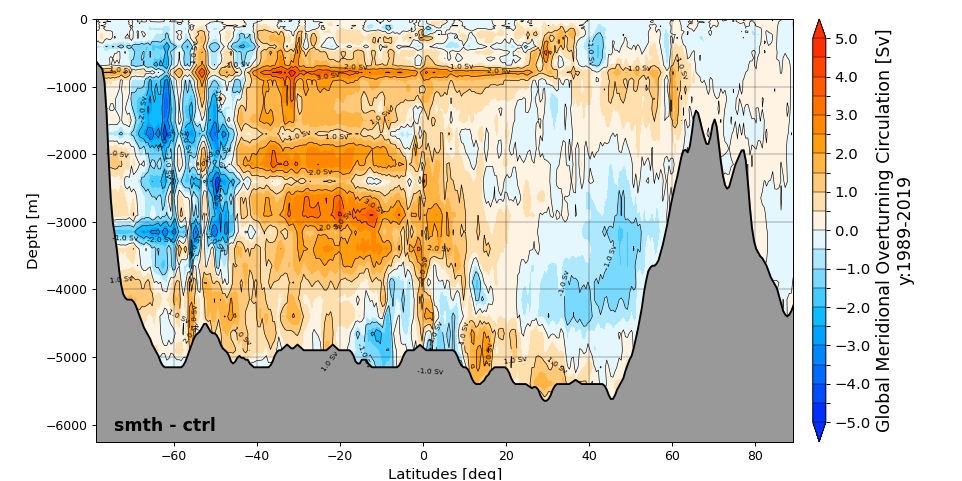

In [34]:
add_bolusw = True
do_tarithm = 'mean'
year       = [1989,2019]
#____________________________________________________________________________________________________
# load vertical velocity 
datapath  = '/work/ollie/pscholz/results_fesom2.0/test_GEBCO15sec_smth@elem/1/'
data      = load_data_fesom2(mesh, datapath, vname='w', year=year, descript='smth', do_info=False, do_tarithm=do_tarithm)
if add_bolusw: data['w'].data = data['w'].data+load_data_fesom2(mesh, datapath, vname='bolus_w', year=year, do_info=False, do_tarithm=do_tarithm)['bolus_w'].data

datapath  = '/work/ollie/pscholz/results_fesom2.0/test_dep_ref@node/1/'
data1      = load_data_fesom2(mesh, datapath, vname='w', year=year, descript='ctrl', do_info=False, do_tarithm=do_tarithm)
if add_bolusw: data1['w'].data = data1['w'].data+load_data_fesom2(mesh, datapath, vname='bolus_w', year=year, do_info=False, do_tarithm=do_tarithm)['bolus_w'].data
    
#____________________________________________________________________________________________________
which_moc = 'gmoc' 
# gmoc  ... global MOC
# amoc  ... atlantic MOC
# aamoc ... atlantic+arctic MOC
# pmoc  ... pacific MOC
# ipmoc ... indian+pacific MOC
# imoc  ... indian MOC

#____________________________________________________________________________________________________
# compute moc 
moc  = calc_xmoc(mesh, data  , which_moc=which_moc)
moc1 = calc_xmoc(mesh, data1 , which_moc=which_moc)
anom = do_anomaly(moc,moc1)

#____________________________________________________________________________________________________
# plot moc
fig, ax, cbar=plot_xmoc([moc, moc1], which_moc=which_moc, n_rc=[1,2], figsize=[12,4], cbar_orient='horizontal')
cinfo=dict({'cnum':10})
fig, ax, cbar=plot_xmoc([anom     ], which_moc=which_moc, n_rc=[1,1], figsize=[12,6], cinfo=cinfo)

## > <u>Compute MOC time-series</u>:

_____calc. AMOC from vertical velocities via meridional bins_____
 --> total time:7.020 s


<IPython.core.display.Javascript object>


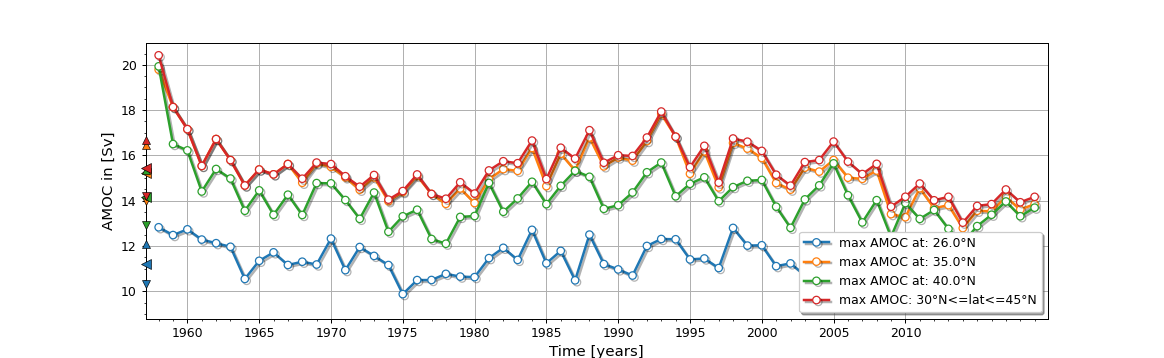

In [40]:
add_bolusw = True
do_tarithm = 'None'
year       = [1958,2019]
#____________________________________________________________________________________________________
# load vertical velocity 
datapath  = '/work/ollie/pscholz/results_fesom2.0/test_GEBCO15sec_smth@elem/1/'
data      = load_data_fesom2(mesh, datapath, vname='w', year=year, descript='smth', do_info=False, do_tarithm=do_tarithm)
if add_bolusw: data['w'].data = data['w'].data+load_data_fesom2(mesh, datapath, vname='bolus_w', year=year, do_info=False, do_tarithm=do_tarithm)['bolus_w'].data

#____________________________________________________________________________________________________
# compute moc profile over time
which_lat = [26.0, 35.0, 40.0,'max']
which_moc = 'amoc' 
# gmoc  ... global MOC
# amoc  ... atlantic MOC
# aamoc ... atlantic+arctic MOC
# pmoc  ... pacific MOC
# ipmoc ... indian+pacific MOC
# imoc  ... indian MOC
moc  = calc_xmoc(mesh, data, which_moc=which_moc)

#____________________________________________________________________________________________________
# compute time-series
count=0
nt    = moc['time'].values.size
moc_t = np.zeros((nt, len(which_lat)))
time  = np.zeros((nt,))
for nti in range(nt):
    #_______________________________________________________________________________________________
    # look for maximum value below 500m at certain latitude or between latitudinal range 'max' 
    # (looks between 30°N and 45°N)
    moc_d=moc.isel(time=nti, nz=moc['depth']<=-500).copy()
    for nli, lat in enumerate(which_lat):
        if lat=='max': moc_t[nti, nli]= moc_d['moc'].isel(ny=(moc_d['lat']>=30) & (moc_d['lat']<=45)).max().values
        else         : moc_t[nti, nli]= moc_d['moc'].isel(ny=np.where(moc_d['lat'].values>=lat)[0][0] ).max().values
    time[nti]=moc['time.year'].values[nti]    
    
#____________________________________________________________________________________________________
# plot time-series
fig,ax=plot_xmoc_tseries(time,moc_t,which_lat,which_moc)  